In [2]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import researchpy
import scipy.stats as stats
import pylab

In [3]:
# Importing the data
df=pd.read_csv('bank-additional-full.csv',delimiter=";")
print("Data is successfully imported")

Data is successfully imported


In [4]:
print(" A glimpse of data")
df.head()

 A glimpse of data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# The dimension of the data
print("The dimension of the dataset is {} ".format(df.shape))

The dimension of the dataset is (41188, 21) 


In [6]:
# Data description of numerical variables
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Data description of categorical variables
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [8]:
# Finding Missing Value in the Dataset
data_total = df.isnull().sum().sort_values(ascending=False)

# Percentage of missing value in the dataset
percentage = (((df.isnull().sum()/df.shape[0]))*100).sort_values(ascending=False)

# Table
table = pd.concat([data_total,percentage],keys=['Total','Percentage'],axis=1)
table

,Total,Percentage
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


No null values present

In [9]:
## Finding the duplicate instances
data_dup = df[df.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [10]:
# Drop the duplicates
df.drop_duplicates(keep="last",inplace=True)
print("The dimensions of the data set after removal of duplicates {}".format(df.shape))

The dimensions of the data set after removal of duplicates (41176, 21)


## Finding outliers

<AxesSubplot:xlabel='age'>

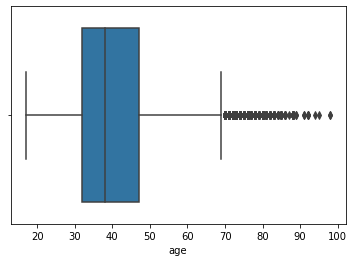

In [11]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='campaign'>

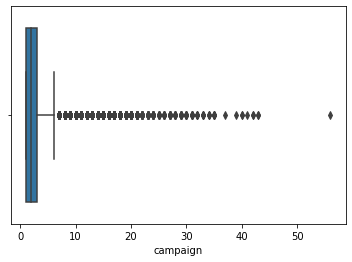

In [12]:
sns.boxplot(df.campaign)

<AxesSubplot:xlabel='pdays'>

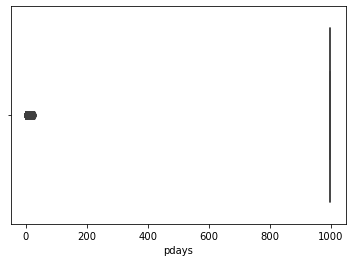

In [13]:
sns.boxplot(df.pdays)

<AxesSubplot:xlabel='previous'>

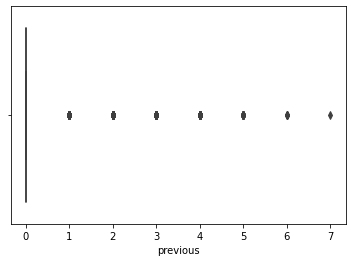

In [14]:
sns.boxplot(df.previous)

<AxesSubplot:xlabel='emp.var.rate'>

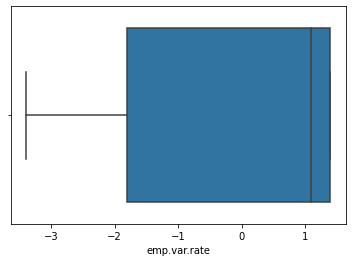

In [15]:
sns.boxplot(df['emp.var.rate'])

<AxesSubplot:xlabel='cons.price.idx'>

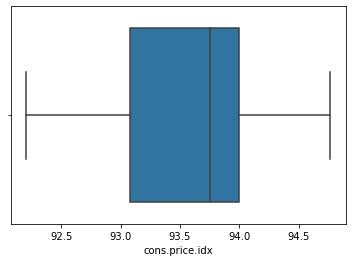

In [16]:
sns.boxplot(df['cons.price.idx'])

<AxesSubplot:xlabel='cons.conf.idx'>

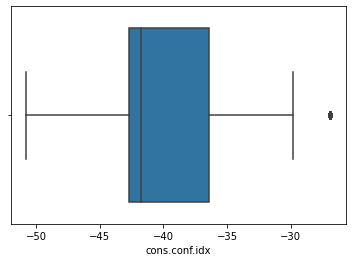

In [17]:
sns.boxplot(df['cons.conf.idx'])

<AxesSubplot:xlabel='euribor3m'>

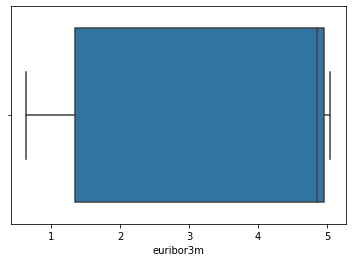

In [18]:
sns.boxplot(df['euribor3m'])

<AxesSubplot:xlabel='nr.employed'>

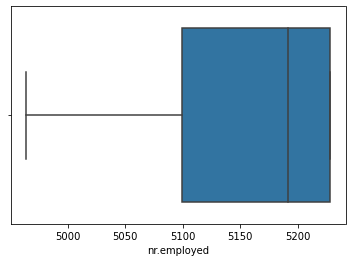

In [19]:
sns.boxplot(df['nr.employed'])

In [20]:
# Univariate Analysis

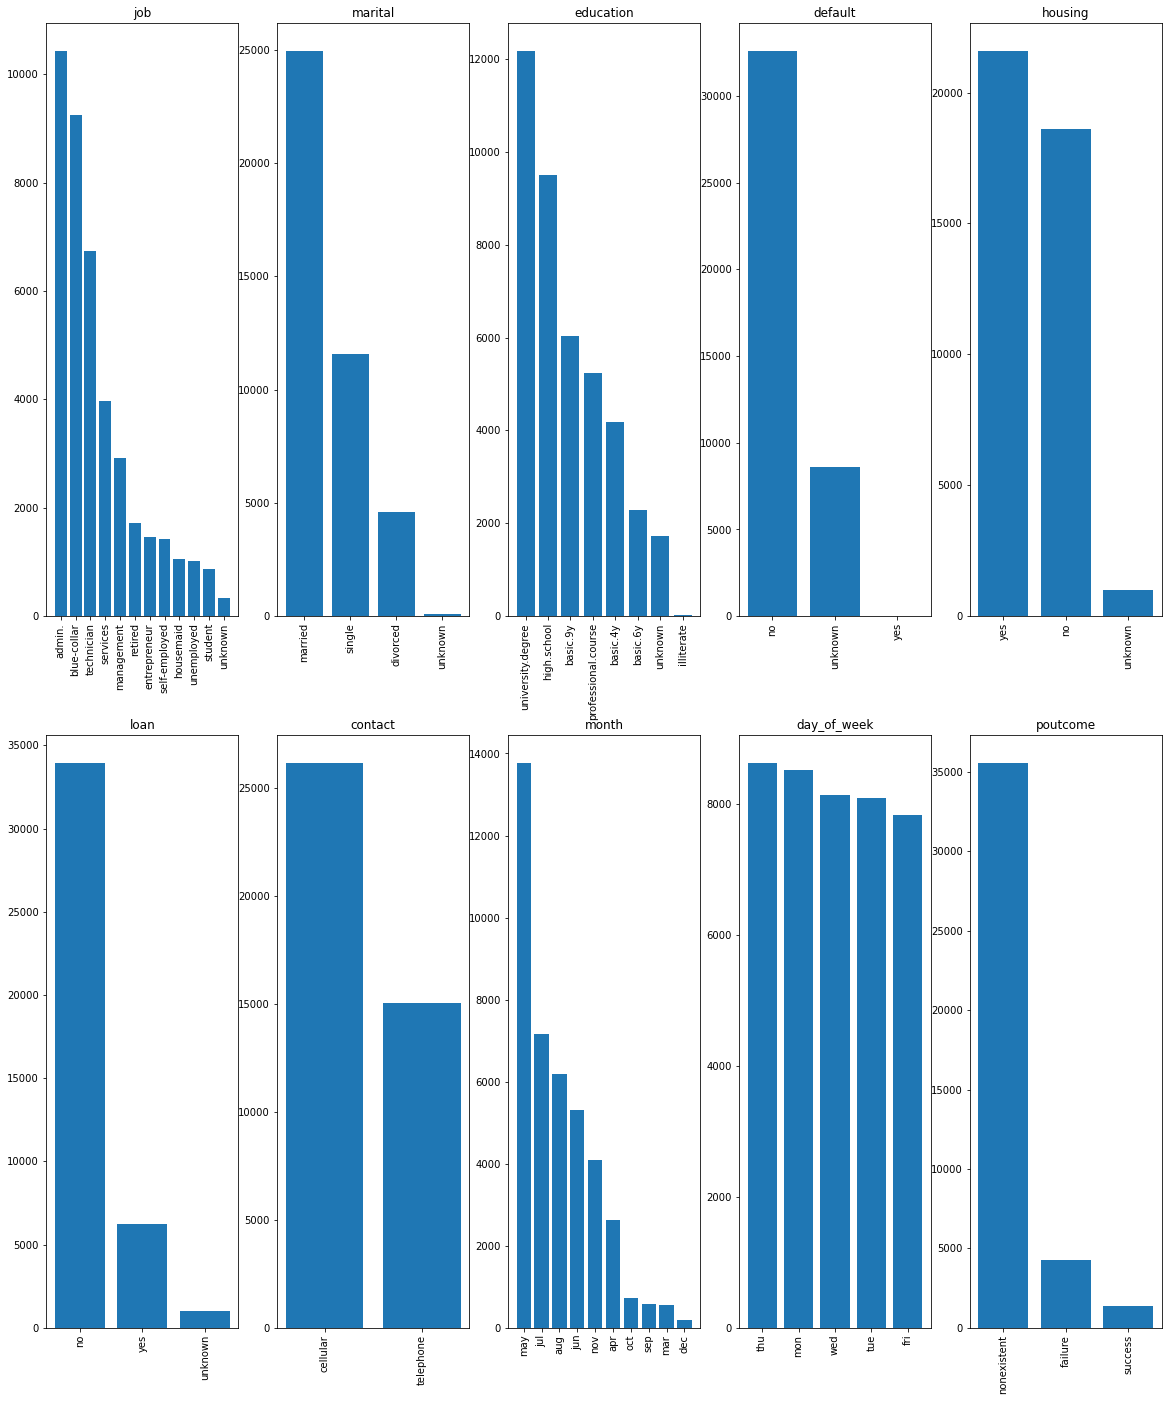

In [21]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week','poutcome']
fig, axs = plt.subplots(2,5, sharex=False, sharey=False, figsize=(20,24))
                                                                
counter=0
for cat_column in cat_columns:
    value_counts=df[cat_column].value_counts()
    trace_x=counter//5
    trace_y=counter%5
    x_pos=np.arange(0,len(value_counts))
    
    axs[trace_x,trace_y].bar(x_pos,value_counts.values,tick_label=value_counts.index)
    axs[trace_x,trace_y].set_title(cat_column)
    for tick in axs[trace_x,trace_y].get_xticklabels():
        tick.set_rotation(90)
    counter+=1
plt.show()   

Text(0.5, 1.05, 'Pearson correlation of Features')

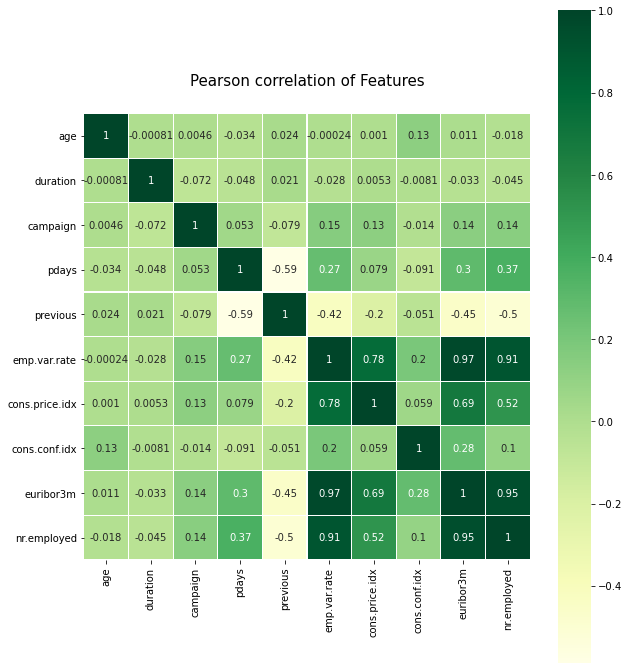

In [22]:
#CORRELATION MATRIX OF NUMERICAL FEATURES
%matplotlib inline
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

From the above heatmap it can be observed that there are some numerical features which share a high correlation between them, e.g nr.employed and emp.var.rate share a correlation of 0.91, nr.employed and euribor3m these features share a correlation value of 0.95 and the correlation between euribor3m and emp.var.rate is 0.97, which is quite high in comparison with other features present in the heatmap.

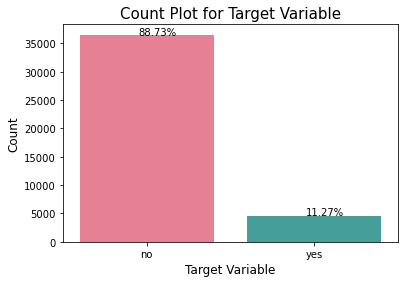

In [23]:
target=df['y']
target.value_counts()
sns.countplot(x=target,palette='husl')

plt.text(x = 0.95, y = target.value_counts()[1] + 1, s = str(round((target.value_counts()[1])*100/len(target),2)) + '%')
plt.text(x = -0.05, y =target.value_counts()[0] +1, s = str(round((target.value_counts()[0])*100/len(target),2)) + '%')
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

Hence we can say this dataset is an imbalanced one

### Bivariate Analysis

### 1) Categorical columns vs Y

### Job Profile and deposit

In [24]:
table=pd.crosstab(df.job,df.y)
table

y,no,yes
job,,
admin.,9068,1351
blue-collar,8615,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1284,434
self-employed,1272,149
services,3644,323
student,600,275


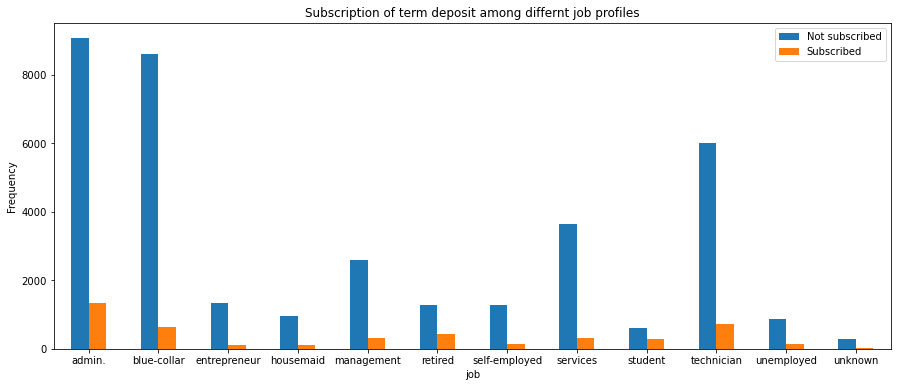

In [25]:
pd.crosstab(df.job,df.y).plot(kind="bar",stacked=False,figsize=(15,6))
plt.title('Subscription of term deposit among differnt job profiles')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(["Not subscribed","Subscribed"])
plt.show()

 It can be observed that the customers who have a job of admin have the highest rate of subscribing to a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

In [26]:
stat, p, dof, expected = chi2_contingency(table,correction=False)
crosstab,res1,exp=researchpy.crosstab(df['job'],df['y'],test='chi-square',expected_freqs=True)
res1

,Chi-square test,results
0,Pearson Chi-square ( 11.0) =,961.7438
1,p-value =,0.0000
2,Cramer's V =,0.1528


In [27]:
# H0: Subscription and job profile are independent  against H1: not H0
# interpret p-value
print('dof=%d' % dof)
alpha = 0.05
print("p value is " + str(p))
print('significance=%.3f, p=%f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=11
p value is 3.2684116066165443e-199
significance=0.050, p=0.000000
Dependent (reject H0)
probability=0.950, critical=19.675, stat=961.744
Dependent (reject H0)


Hence we can conclude that the columns "job" and "y" are not independent.

### Marital status vs subscription

In [28]:
table2=pd.crosstab(df.marital,df.y)
table2

y,no,yes
marital,,
divorced,4135,476
married,22390,2531
single,9944,1620
unknown,68,12


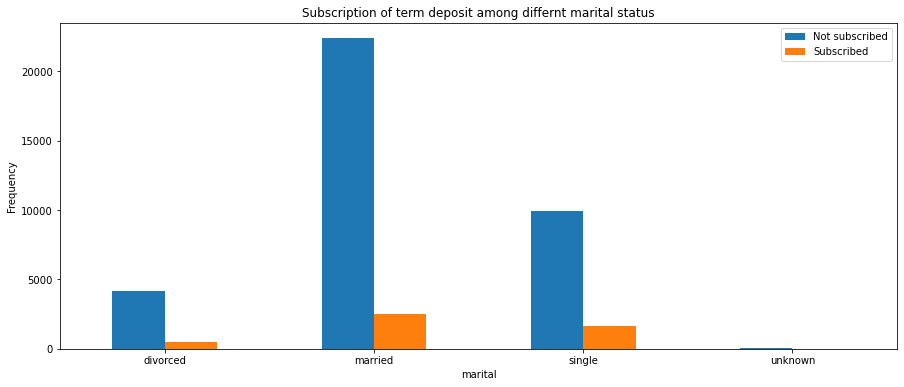

In [29]:
table2.plot(kind="bar",stacked=False,figsize=(15,6))
plt.title('Subscription of term deposit among differnt marital status')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(['Not subscribed','Subscribed'])
plt.show()

The number of subscribers is highest for married customers, closely followed by customers who are single and remarkably less for divorced customers.

In [30]:
stat, p, dof, expected = chi2_contingency(table2,correction=False)
crosstab,res2,exp=researchpy.crosstab(df['marital'],df['y'],test='chi-square',expected_freqs=True)
res2

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,122.9593
1,p-value =,0.0000
2,Cramer's V =,0.0546


In [31]:
# H0: Subscription and job marital status are independent  against H1: not H0
# interpret p-value
print('dof=%d' % dof)
alpha = 0.05
print("p value is " + str(p))
print('significance=%.3f, p=%f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=3
p value is 1.7784225004611415e-26
significance=0.050, p=0.000000
Dependent (reject H0)
probability=0.950, critical=7.815, stat=122.959
Dependent (reject H0)


 Hence we can conclude that the columns "marital" and "y" are not independent.

### Education level vs Subscription

In [32]:
table3=pd.crosstab(df.education,df.y)
table3

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2103,188
basic.9y,5572,473
high.school,8481,1031
illiterate,14,4
professional.course,4645,595
university.degree,10495,1669
unknown,1479,251


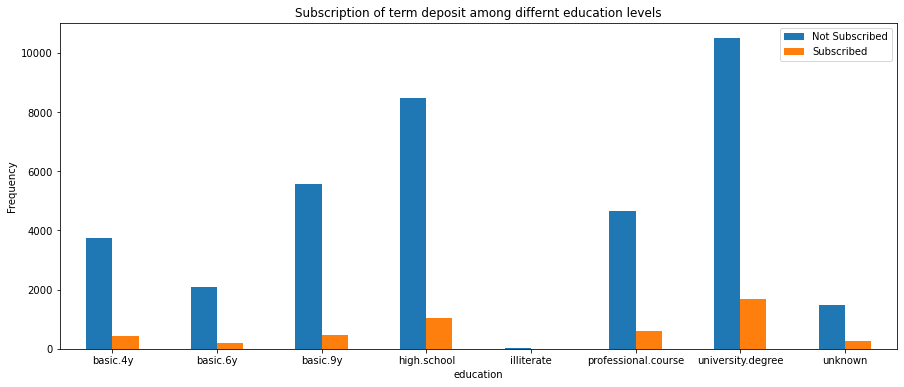

In [33]:
table3.plot(kind="bar",stacked=False,figsize=(15,6))
plt.title('Subscription of term deposit among differnt education levels')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(["Not Subscribed","Subscribed"])
plt.show()

Customers who possess university degree have the highest rate of subscribing to a term deposit.

In [34]:
stat, p, dof, expected = chi2_contingency(table3,correction=False)
crosstab,res3,exp=researchpy.crosstab(df['education'],df['y'],test='chi-square',expected_freqs=True)
res3

,Chi-square test,results
0,Pearson Chi-square ( 7.0) =,192.8485
1,p-value =,0.0000
2,Cramer's V =,0.0684


In [35]:
# H0: Subscription and education levels are independent  against H1: not H0
# interpret p-value
print('dof=%d' % dof)
alpha = 0.05
print("p value is " + str(p))
print('significance=%.3f, p=%f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=7
p value is 3.746768377534744e-38
significance=0.050, p=0.000000
Dependent (reject H0)
probability=0.950, critical=14.067, stat=192.849
Dependent (reject H0)


Hence we can conclude that the columns "education" and "y" are not independent.

### Subscription vs default in credit

In [36]:
table4=pd.crosstab(df.default,df.y)
table4

y,no,yes
default,,
no,28381,4196
unknown,8153,443
yes,3,0


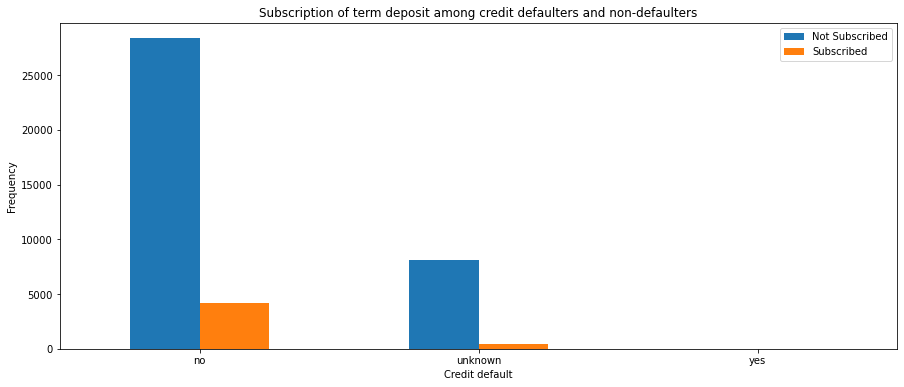

In [37]:
table4.plot(kind="bar",stacked=False,figsize=(15,6))
plt.title('Subscription of term deposit among credit defaulters and non-defaulters')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.xlabel("Credit default")
plt.legend(["Not Subscribed","Subscribed"])
plt.show()

 It can be clearly observed that there are no customers who have credit in default. Majority of customers who have subscribed to the term deposit don't have their credit in default. Whereas for the rest of the customers who have subscribed, this field is unknown.

In [38]:
stat, p, dof, expected = chi2_contingency(table4,correction=False)
crosstab,res4,exp=researchpy.crosstab(df['default'],df['y'],test='chi-square',expected_freqs=True)
res4

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,406.5561
1,p-value =,0.0000
2,Cramer's V =,0.0994


In [39]:
# H0: Subscription and default in credit are independent  against H1: not H0
# interpret p-value
print('dof=%d' % dof)
alpha = 0.05
print("p value is " + str(p))
print('significance=%.3f, p=%f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
p value is 5.2175408937279634e-89
significance=0.050, p=0.000000
Dependent (reject H0)
probability=0.950, critical=5.991, stat=406.556
Dependent (reject H0)


Hence we can conclude that the columns "default" and "y" are not independent.

### Subscription vs housing loan

In [40]:
table5=pd.crosstab(df.housing,df.y)
table5

y,no,yes
housing,,
no,16590,2025
unknown,883,107
yes,19064,2507


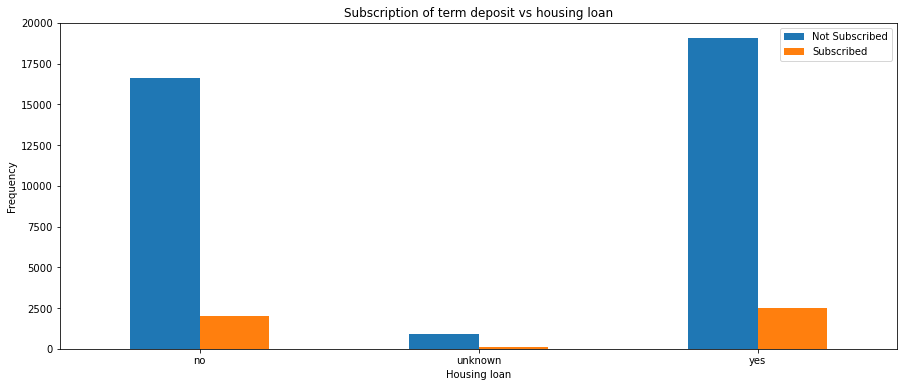

In [41]:
table5.plot(kind="bar",stacked=False,figsize=(15,6))
plt.title('Subscription of term deposit vs housing loan')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.xlabel("Housing loan")
plt.legend(["Not Subscribed","Subscribed"])
plt.show()

Majority of customers who have subscribed to a term deposit, have a housing loan.

In [42]:
stat, p, dof, expected = chi2_contingency(table5,correction=False)
crosstab,res5,exp=researchpy.crosstab(df['housing'],df['y'],test='chi-square',expected_freqs=True)
res5

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,5.7422
1,p-value =,0.0566
2,Cramer's V =,0.0118


In [43]:
print('dof=%d' % dof)
print(expected)
# H0: Subscription and Housing loan are independent  against H1: not H0
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
print('significance=%.3f, p=%f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    # interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[16517.78353895  2097.21646105]
 [  878.46391102   111.53608898]
 [19140.75255003  2430.24744997]]
p value is 0.056637927494525425
significance=0.050, p=0.056638
Independent (H0 holds true)
probability=0.950, critical=5.991, stat=5.742
Independent (fail to reject H0)


 Hence we can conclude that the columns "housing" and "y" are independent.

### Subscription vs loan

In [44]:
table6=pd.crosstab(df.loan,df.y)
table6

y,no,yes
loan,,
no,30089,3849
unknown,883,107
yes,5565,683


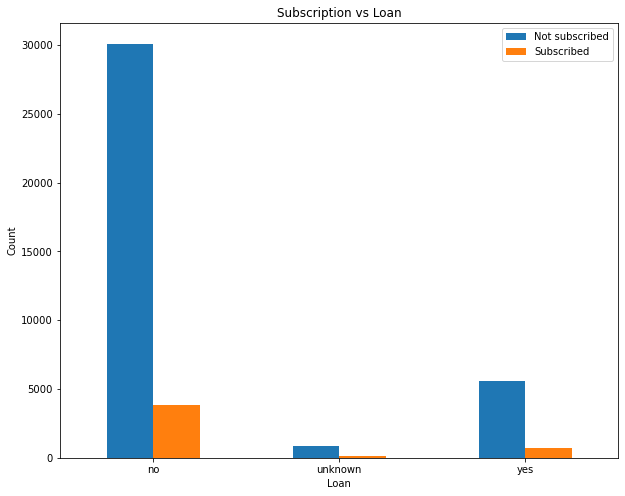

In [45]:
table6.plot(kind="bar",stacked=False,figsize=(10,8))
plt.title("Subscription vs Loan")
plt.ylabel("Count")
plt.xlabel("Loan")
plt.legend(["Not subscribed","Subscribed"])
plt.xticks(rotation=0)
plt.show()

Mostly customers with no personal loan have subscribed to a term deposit.

In [46]:
stat,p,dof,expected=chi2_contingency(table6,correction=False)
crosstab,res6,exp=researchpy.crosstab(df['loan'],df['y'],test='chi-square',expected_freqs=True)
res6

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,1.0993
1,p-value =,0.5772
2,Cramer's V =,0.0052


In [47]:
# H0: Subscription and personel loan are independent  against H1: not H0
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
print('significance=%.3f, p=%f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    # interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

p value is 0.5771532081176227
significance=0.050, p=0.577153
Independent (H0 holds true)
probability=0.950, critical=5.991, stat=1.099
Independent (fail to reject H0)


 Hence we can conclude that the columns "loan" and "y" are independent.

### Subscription vs contact

In [48]:
table7=pd.crosstab(df.contact,df.y)
table7

y,no,yes
contact,,
cellular,22283,3852
telephone,14254,787


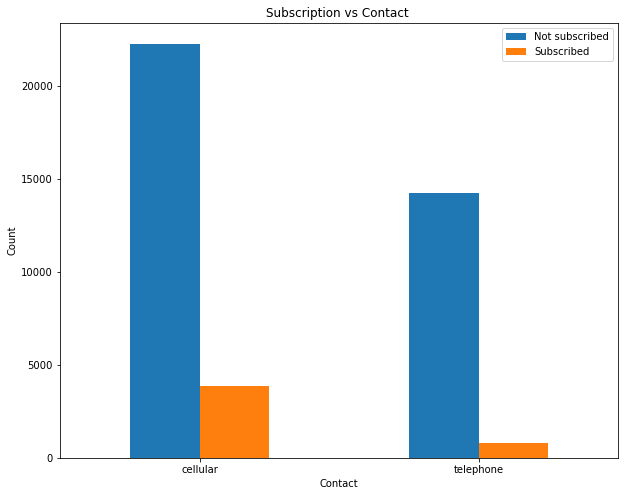

In [49]:
table7.plot(kind="bar",stacked=False,figsize=(10,8))
plt.title("Subscription vs Contact ")
plt.ylabel("Count")
plt.xlabel("Contact")
plt.legend(["Not subscribed","Subscribed"])
plt.xticks(rotation=0)
plt.show()

 Majority of customers who were contacted through cellular phones have subscribed to a term deposit.

In [50]:
stat,p,dof,expected=chi2_contingency(table7,correction=False)
crosstab,res7,exp=researchpy.crosstab(df['contact'],df['y'],test='chi-square',expected_freqs=True)
res7

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,863.0314
1,p-value =,0.0000
2,Cramer's phi =,0.1448


In [51]:
# H0: Subscription and mode of contact are independent  against H1: not H0
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
print('significance=%.3f, p=%f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    # interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

p value is 1.0679116188638285e-189
significance=0.050, p=0.000000
Dependent (reject H0)
probability=0.950, critical=3.841, stat=863.031
Dependent (reject H0)


 Hence we can conclude that the columns "contact" and "y" are not independent.

### Subscription and month

In [52]:
table8=pd.crosstab(df.month,df.y)
table8

y,no,yes
month,,
apr,2092,539
aug,5521,655
dec,93,89
jul,6521,648
jun,4759,559
mar,270,276
may,12881,886
nov,3684,416
oct,402,315


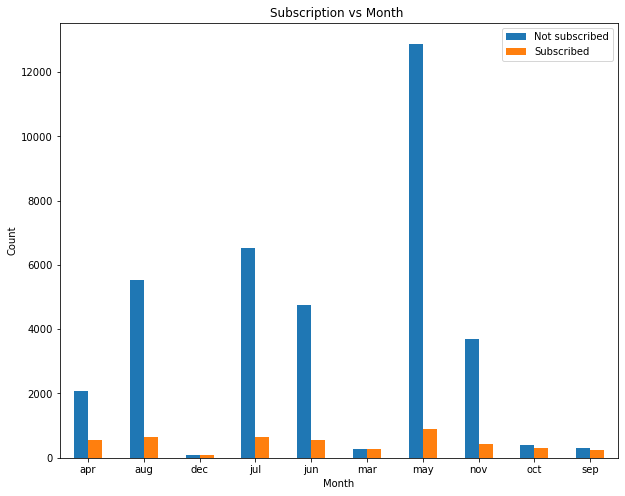

In [53]:
table8.plot(kind="bar",stacked=False,figsize=(10,8))
plt.title("Subscription vs Month ")
plt.ylabel("Count")
plt.xlabel("Month")
plt.legend(["Not subscribed","Subscribed"])
plt.xticks(rotation=0)
plt.show()

 Maximum subscriptions have been made between the months April - July.

In [54]:
stat,p,dof,expected=chi2_contingency(table8,correction=False)
crosstab,res8,exp=researchpy.crosstab(df['month'],df['y'],test='chi-square',expected_freqs=True)
res8

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,3103.0327
1,p-value =,0.0000
2,Cramer's V =,0.2745


In [55]:
# H0: Subscription and month are independent  against H1: not H0
# interpret p-value
alpha = 0.05
print("degree of freedom=%d" %dof)
print("p value is " + str(p))
print('significance=%.3f, p=%f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    # interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

degree of freedom=9
p value is 0.0
significance=0.050, p=0.000000
Dependent (reject H0)
probability=0.950, critical=16.919, stat=3103.033
Dependent (reject H0)


 Hence we can conclude that the columns "month" and "y" are not independent.

### Subscription and day of week

In [56]:
table9=pd.crosstab(df.day_of_week,df.y)
table9

y,no,yes
day_of_week,,
fri,6980,846
mon,7665,847
thu,7574,1044
tue,7133,953
wed,7185,949


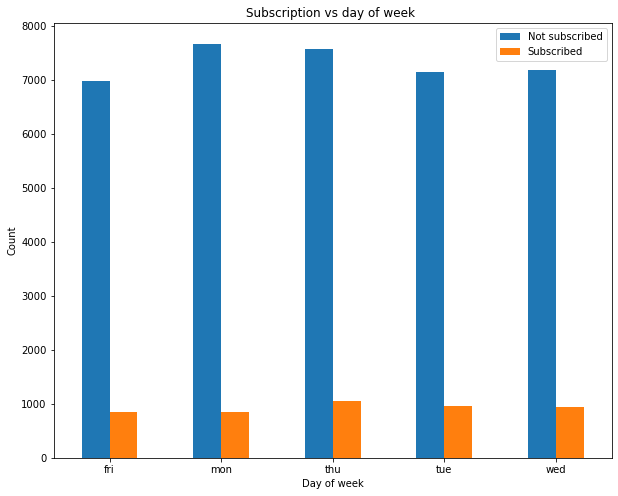

In [57]:
table9.plot(kind="bar",stacked=False,figsize=(10,8))
plt.title("Subscription vs day of week ")
plt.ylabel("Count")
plt.xlabel("Day of week")
plt.legend(["Not subscribed","Subscribed"])
plt.xticks(rotation=0)
plt.show()

In [58]:
stat,p,dof,expected=chi2_contingency(table9,correction=False)
crosstab,res9,exp=researchpy.crosstab(df['day_of_week'],df['y'],test='chi-square',expected_freqs=True)
res9

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,26.0542
1,p-value =,0.0000
2,Cramer's V =,0.0252


In [59]:
# H0: Subscription and mode of contact are independent  against H1: not H0
# interpret p-value
alpha = 0.05
print("degree of freedom=%d" %dof)
print("p value is " + str(p))
print('significance=%.3f, p=%f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    # interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

degree of freedom=4
p value is 3.085754965631743e-05
significance=0.050, p=0.000031
Dependent (reject H0)
probability=0.950, critical=9.488, stat=26.054
Dependent (reject H0)


 Hence we can conclude that the columns "day_of_week" and "y" are not independent.

### poutcome vs Subscription

In [60]:
table10=pd.crosstab(df.poutcome,df.y)
table10

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32411,3140
success,479,894


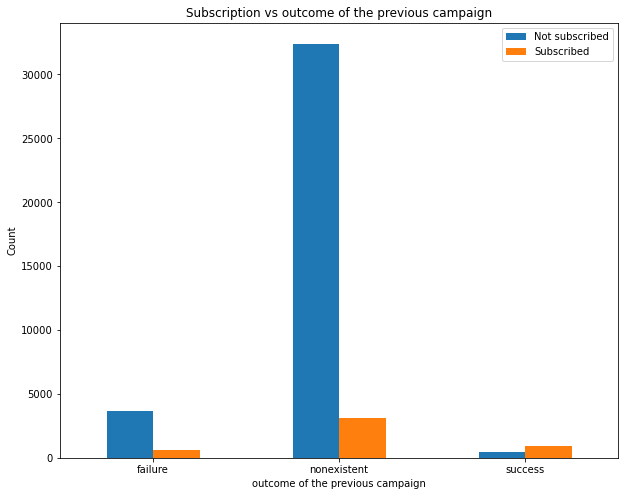

In [61]:
table10.plot(kind="bar",stacked=False,figsize=(10,8))
plt.title("Subscription vs outcome of the previous campaign")
plt.ylabel("Count")
plt.xlabel("outcome of the previous campaign")
plt.legend(["Not subscribed","Subscribed"])
plt.xticks(rotation=0)
plt.show()

Customers with no records in the previous campaign have the highest rate of subscribing to a term deposit. Customers for whom the previous campaign resulted in success have subscribed to the deposit more in comparison with customers for whom it resulted in a failure.

In [62]:
stat,p,dof,expected=chi2_contingency(table10,correction=False)
crosstab,res10,exp=researchpy.crosstab(df['poutcome'],df['y'],test='chi-square',expected_freqs=True)
res10

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,4230.1434
1,p-value =,0.0000
2,Cramer's V =,0.3205


In [63]:
# H0: Subscription and outcome of the previous campaign are independent  against H1: not H0
# interpret p-value
print("degree of freedom=%d" %dof)
alpha = 0.05
print("p value is " + str(p))
print('significance=%.3f, p=%f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    # interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

degree of freedom=2
p value is 0.0
significance=0.050, p=0.000000
Dependent (reject H0)
probability=0.950, critical=5.991, stat=4230.143
Dependent (reject H0)


 Hence we can conclude that the columns "poutcome" and "y" are not independent.

## 2) Numerical columns vs Y

### Subscription vs Age

<AxesSubplot:xlabel='age', ylabel='Density'>

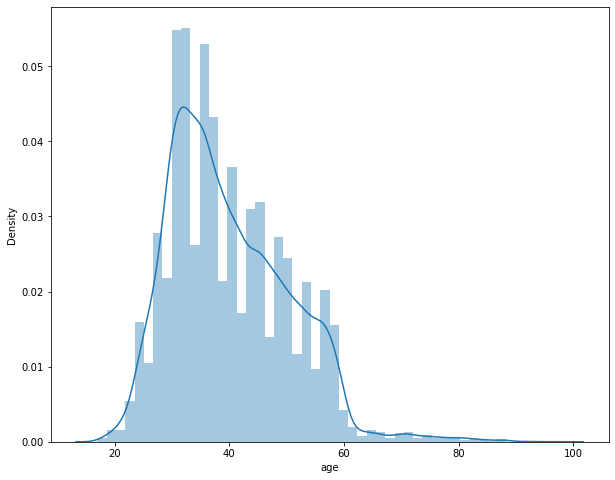

In [64]:
plt.figure(figsize=(10,8))
sns.distplot(df["age"])

From the plot it can be observed most of the customers are in the age range of 30-40

Text(0.5, 1.0, 'Age')

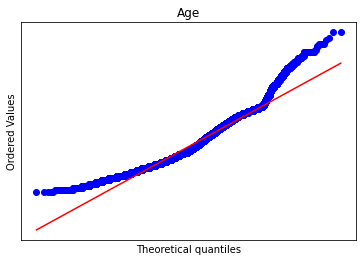

In [65]:
x=df.age
pylab.xticks([]),pylab.yticks([])
stats.probplot(x, dist="norm", plot=pylab)
pylab.title('Age')

In [66]:
# H0: Age follows normal distribution
from scipy.stats import norm
from statsmodels.stats.diagnostic import lilliefors
lilliefors(df['age'])

(0.09444426649909354, 0.0009999999999998899)

Since p-value= 0.0009999999999998899<0.05, we can conclude that the underlying distribution is not normal.

In [67]:
#H0:Variances of the two groups of age divided on basis of subscription are same
from scipy.stats import levene
age_yes=x[df.y=='yes']
age_no=x[df.y=='no']
stat, p = levene(age_yes,age_no)
alpha=0.05
if p < alpha:
    print("Variance of two groups are different ")
else:
    print("Variance of the two groups are equivalent")

Variance of two groups are different 


Since the assumptions of point biserial correlation coefficient are not fulfilled, it cannot be used to measure the association between "age" and "y".

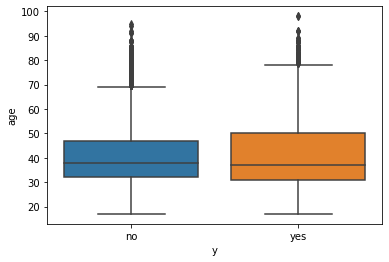

In [68]:
#AGE
%matplotlib inline
sns.boxplot(data=df, x="y", y="age")
plt.show()

### Subscription vs duration

<AxesSubplot:xlabel='duration', ylabel='Count'>

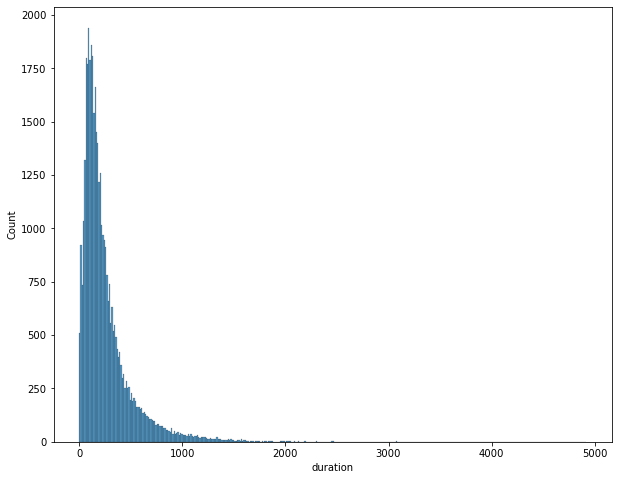

In [118]:
#DURATION
plt.figure(figsize=(10,8))
sns.histplot(df["duration"])

Text(0.5, 1.0, 'Duration')

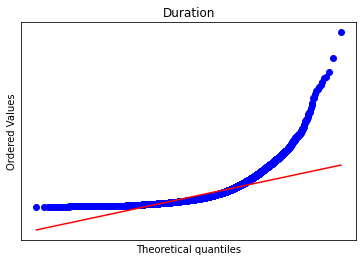

In [70]:
pylab.xticks([]),pylab.yticks([])
stats.probplot(df.duration, dist="norm", plot=pylab)
pylab.title('Duration')

In [71]:
#H0: Duration follows normal distribution
lilliefors(df['duration'])

(0.16950784124612228, 0.0009999999999998899)

Since p-value= 0.0009999999999998899<0.05, we can conclude that the underlying distribution is not normal.

In [72]:
#H0: Variances of the two groups of Duration based on subscription are same
x_yes=df['duration'][df.y=='yes']
x_no=df['duration'][df.y=='no']
stat, p = levene(x_yes,x_no)
if p < alpha:
    print("Variance of two groups are different ")
else:
    print("Variance of the two groups are equivalent")

Variance of two groups are different 


Since the assumptions of point biserial correlation coefficient are not fulfilled, it cannot be used to measure the association between "duration" and "y".

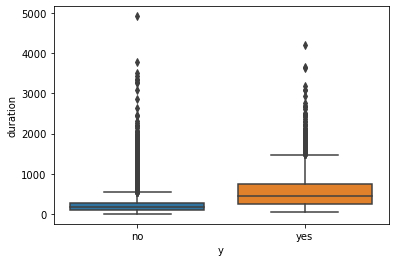

In [73]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="duration")
plt.show()

### campaign and deposit

<AxesSubplot:xlabel='campaign', ylabel='Count'>

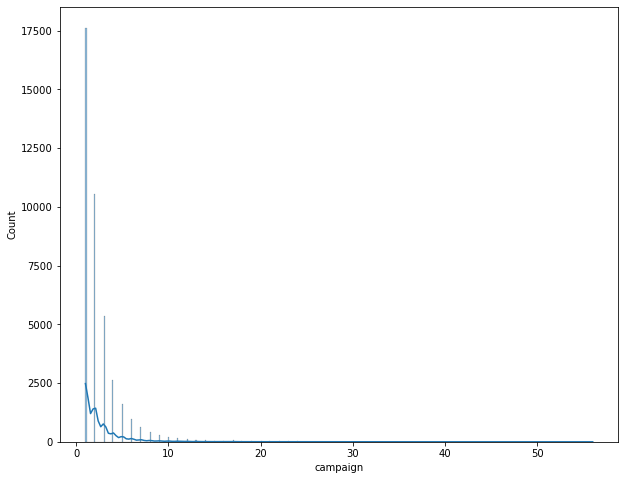

In [117]:
plt.figure(figsize=(10,8))
sns.histplot(df["campaign"],kde=True)

Text(0.5, 1.0, 'campaign')

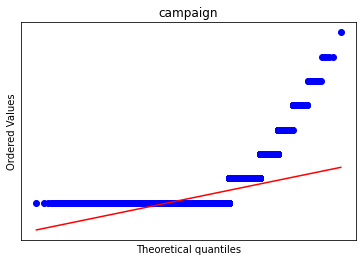

In [75]:
pylab.xticks([]),pylab.yticks([])
stats.probplot(df.previous, dist="norm", plot=pylab)
pylab.title('campaign')

In [76]:
# H0: campaign follows normal distribution
lilliefors(df['campaign'])

(0.28571171545319907, 0.0009999999999998899)

Since p-value= 0.0009999999999998899<0.05, we can conclude that the underlying distribution is not normal.

In [77]:
#H0: Variances of the two groups of Campaign based on subscription are same
x_yes=df['campaign'][df.y=='yes']
x_no=df['campaign'][df.y=='no']
stat, p = levene(x_yes,x_no)
if p < alpha:
    print("Variance of two groups are different ")
else:
    print("Variance of the two groups are equivalent")

Variance of two groups are different 


Since the assumptions of point biserial correlation coefficient are not fulfilled, it cannot be used to measure the association between "previous" and "y".

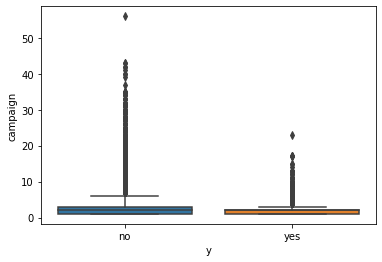

In [78]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="campaign")
plt.show()

### pdays and deposit

<AxesSubplot:xlabel='pdays', ylabel='Count'>

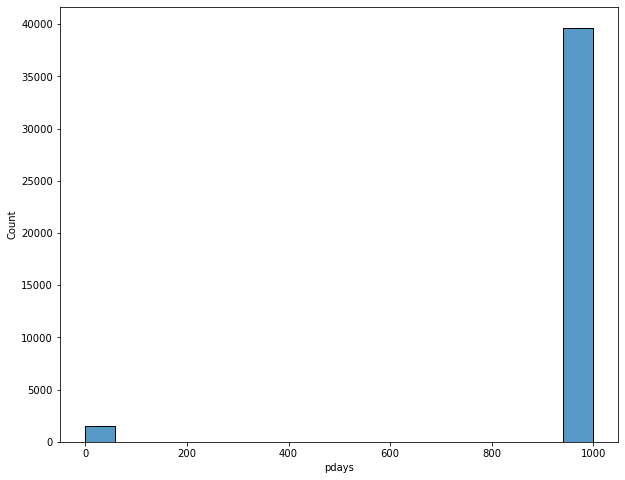

In [114]:
plt.figure(figsize=(10,8))
sns.histplot(df["pdays"])

In [125]:
table=pd.crosstab(df.pdays,df.y)
table

y,no,yes
pdays,,
0,5,10
1,18,8
2,24,37
3,141,298
4,55,63
5,17,29
6,123,289
7,20,40
8,6,12


Most of the values are 999, which means that most of the customers have never been contacted before

Text(0.5, 1.0, 'pdays')

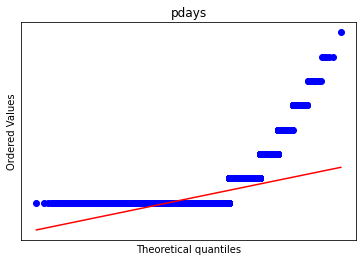

In [80]:
pylab.xticks([]),pylab.yticks([])
stats.probplot(df.previous, dist="norm", plot=pylab)
pylab.title('pdays')

In [81]:
# H0: campaign follows normal distribution
lilliefors(df['pdays'])

(0.5406828954678605, 0.0009999999999998899)

Since p-value= 0.0009999999999998899<0.05, we can conclude that the underlying distribution is not normal.

In [82]:
#H0: Variances of the two groups of pdays based on subscription are same
x_yes=df['pdays'][df.y=='yes']
x_no=df['pdays'][df.y=='no']
stat, p = levene(x_yes,x_no)
if p < alpha:
    print("Variance of two groups are different ")
else:
    print("Variance of the two groups are equivalent")

Variance of two groups are different 


Since the assumptions of point biserial correlation coefficient are not fulfilled, it cannot be used to measure the association between "pdays" and "y".

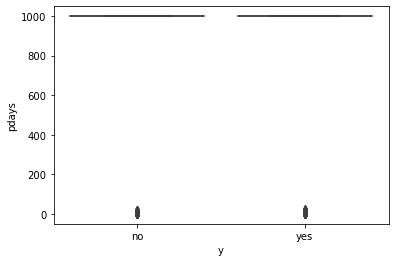

In [83]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="pdays")
plt.show()

### previous and deposit

<AxesSubplot:xlabel='previous', ylabel='Count'>

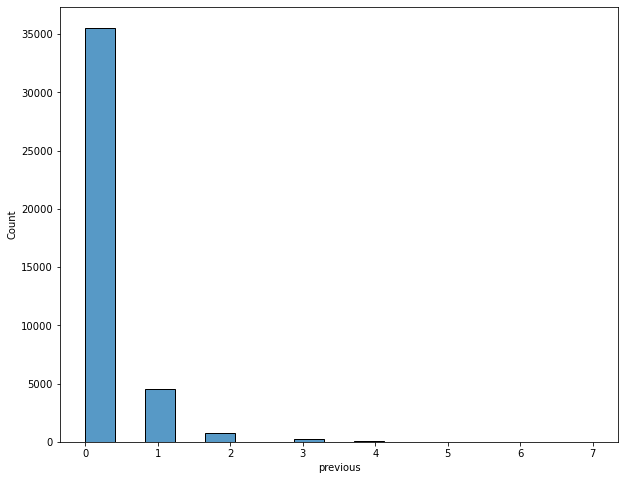

In [119]:
plt.figure(figsize=(10,8))
sns.histplot(df["previous"])

Text(0.5, 1.0, 'Previous')

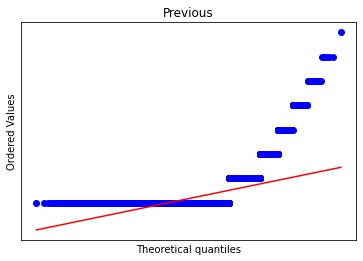

In [85]:
pylab.xticks([]),pylab.yticks([])
stats.probplot(df.previous, dist="norm", plot=pylab)
pylab.title('Previous')

In [86]:
# H0: previous follows normal distribution
lilliefors(df['previous'])

(0.5000520189166138, 0.0009999999999998899)

Since p-value= 0.0009999999999998899<0.05, we can conclude that the underlying distribution is not normal.

In [87]:
#H0: Variances of the two groups of Previous based on subscription are same
x_yes=df['previous'][df.y=='yes']
x_no=df['previous'][df.y=='no']
stat, p = levene(x_yes,x_no)
if p < alpha:
    print("Variance of two groups are different ")
else:
    print("Variance of the two groups are equivalent")

Variance of two groups are different 


Since the assumptions of point biserial correlation coefficient are not fulfilled, it cannot be used to measure the association between "previous" and "y".

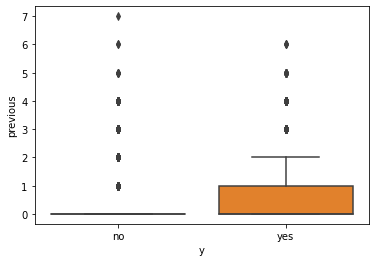

In [88]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="previous")
plt.show()

### employement variation rate and deposit

<AxesSubplot:xlabel='emp.var.rate', ylabel='Count'>

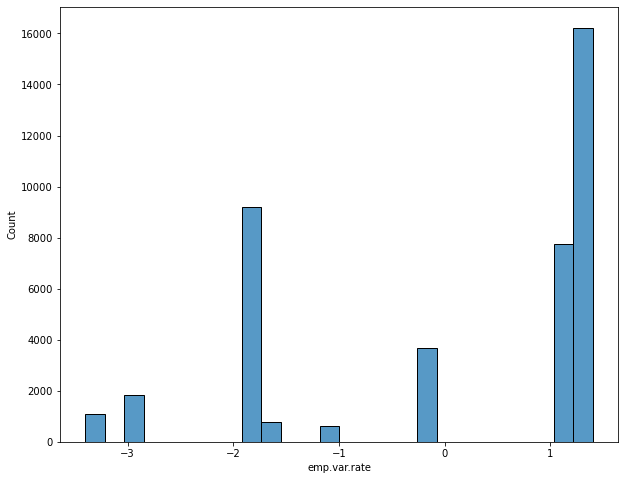

In [120]:
plt.figure(figsize=(10,8))
sns.histplot(df["emp.var.rate"])

Text(0.5, 1.0, 'Employement Variation rate')

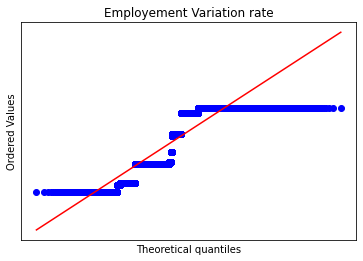

In [90]:
pylab.xticks([]),pylab.yticks([])
stats.probplot(df['emp.var.rate'], dist="norm", plot=pylab)
pylab.title('Employement Variation rate')

In [91]:
# H0: employement variation rate follows normal distribution
lilliefors(df['emp.var.rate'])

(0.32415863956495106, 0.0009999999999998899)

Since p-value= 0.0009999999999998899<0.05, we can conclude that the underlying distribution is not normal.

In [92]:
#H0: Variances of the two groups of employment variation based on subscription are same
x_yes=df['emp.var.rate'][df.y=='yes']
x_no=df['emp.var.rate'][df.y=='no']
stat, p = levene(x_yes,x_no)
if p < alpha:
    print("Variance of two groups are different ")
else:
    print("Variance of the two groups are equivalent")

Variance of two groups are different 


Since the assumptions of point biserial correlation coefficient are not fulfilled, it cannot be used to measure the association between "emp.var.rate" and "y".

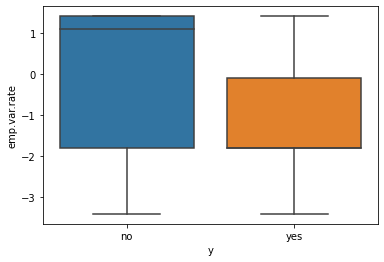

In [93]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="emp.var.rate")
plt.show()

### consumer price index and deposit

<AxesSubplot:xlabel='cons.price.idx', ylabel='Count'>

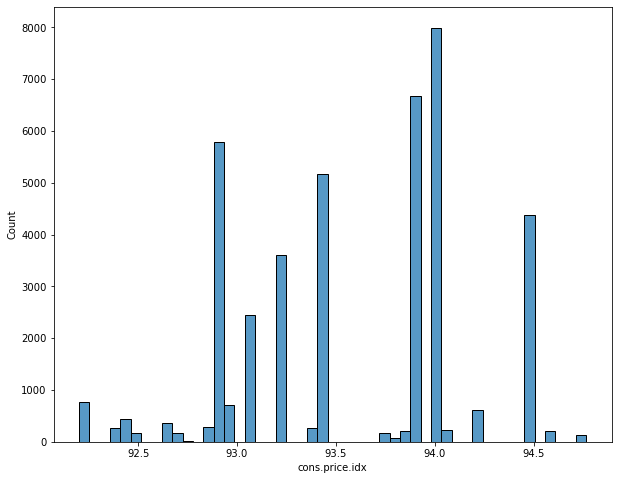

In [121]:
plt.figure(figsize=(10,8))
sns.histplot(df["cons.price.idx"])

Text(0.5, 1.0, 'Consumer price index')

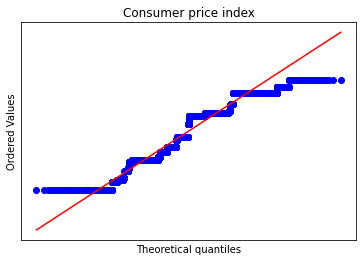

In [95]:
pylab.xticks([]),pylab.yticks([])
stats.probplot(df['cons.price.idx'], dist="norm", plot=pylab)
pylab.title('Consumer price index')

In [96]:
# H0: Consumer price index follows normal distribution
lilliefors(df['cons.price.idx'])

(0.21403177434682719, 0.0009999999999998899)

Since p-value= 0.0009999999999998899<0.05, we can conclude that the underlying distribution is not normal.

In [97]:
# H0: variance of the 2 groups of cons.price.idx based on subscription are same
x_yes=df['cons.price.idx'][df.y=='yes']
x_no=df['cons.price.idx'][df.y=='no']
stat, p = levene(x_yes,x_no)
if p < alpha:
    print("Variance of two groups are different ")
else:
    print("Variance of the two groups are equivalent")

Variance of two groups are different 


Since the assumptions of point biserial correlation coefficient are not fulfilled, it cannot be used to measure the association between "cons.price.idx" and "y".

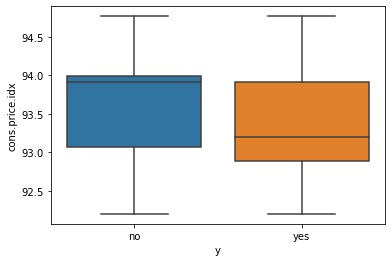

In [98]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="cons.price.idx")
plt.show()

### consumer confidence index and deposit

<AxesSubplot:xlabel='cons.conf.idx', ylabel='Count'>

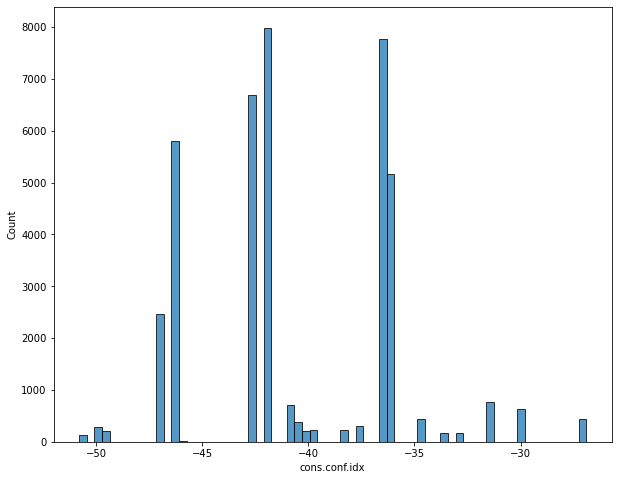

In [122]:
plt.figure(figsize=(10,8))
sns.histplot(df["cons.conf.idx"])

Text(0.5, 1.0, 'Consumer confidence index')

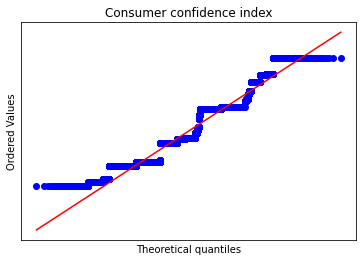

In [100]:
pylab.xticks([]),pylab.yticks([])
stats.probplot(df['cons.conf.idx'], dist="norm", plot=pylab)
pylab.title('Consumer confidence index')

In [101]:
# H0: Consumer confidence index follows normal distribution
lilliefors(df['cons.conf.idx'])

(0.19027997567654542, 0.0009999999999998899)

Since p-value= 0.0009999999999998899<0.05, we can conclude that the underlying distribution is not normal.

In [102]:
#H0: Variances of the two groups of Consumer confidence index based on subscription are same
x_yes=df['cons.conf.idx'][df.y=='yes']
x_no=df['cons.conf.idx'][df.y=='no']
from scipy.stats import levene
stat, p = levene(x_yes,x_no)
if p < alpha:
    print("Variance of two groups are different ")
else:
    print("Variance of the two groups are equivalent")

Variance of two groups are different 


Since the assumptions of point biserial correlation coefficient are not fulfilled, it cannot be used to measure the association between "cons.conf.idx" and "y".

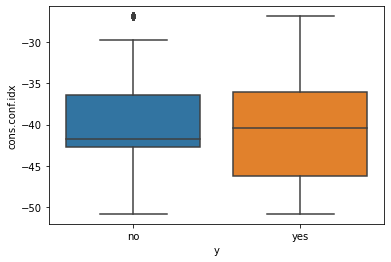

In [103]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="cons.conf.idx")
plt.show()

### Euribor3m and deposit

<AxesSubplot:xlabel='euribor3m', ylabel='Count'>

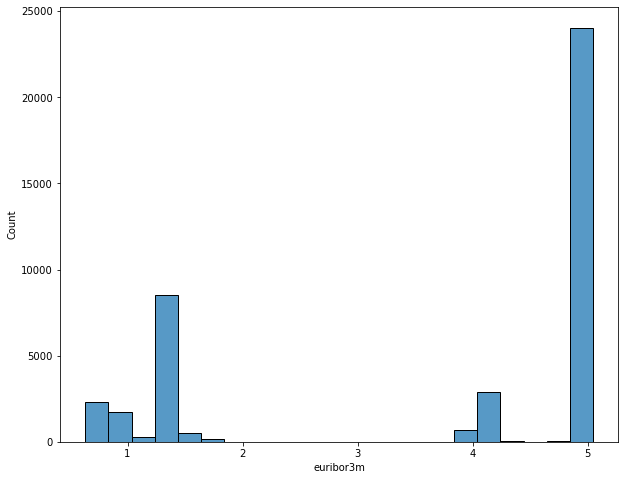

In [123]:
plt.figure(figsize=(10,8))
sns.histplot(df["euribor3m"])

Text(0.5, 1.0, 'Euribor3m')

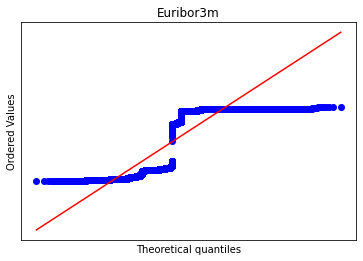

In [105]:
pylab.xticks([]),pylab.yticks([])
stats.probplot(df.euribor3m, dist="norm", plot=pylab)
pylab.title('Euribor3m')

In [106]:
# H0: Euribor 3 month rate follows normal distribution
lilliefors(df['euribor3m'])

(0.34548348198702294, 0.0009999999999998899)

Since p-value= 0.0009999999999998899<0.05, we can conclude that the underlying distribution is not normal.

In [107]:
#H0: Variances of the two groups of Euribor 3 month rate based on subscription are same
euribor3m_yes=df['euribor3m'][df.y=='yes']
euribor3m_no=df['euribor3m'][df.y=='no']
stat, p = levene(euribor3m_yes,euribor3m_no)
if p < alpha:
    print("Variance of two groups are different ")
else:
    print("Variance of the two groups are equivalent")

Variance of two groups are different 


Since the assumptions of point biserial correlation coefficient are not fulfilled, it cannot be used to measure the association between "euribor3m" and "y".

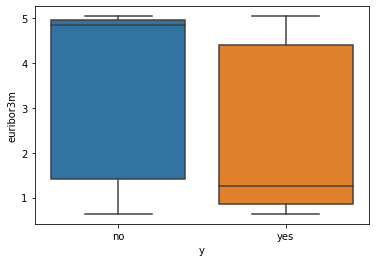

In [108]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="euribor3m")
plt.show()

### number of employee and deposit 

<AxesSubplot:xlabel='nr.employed', ylabel='Count'>

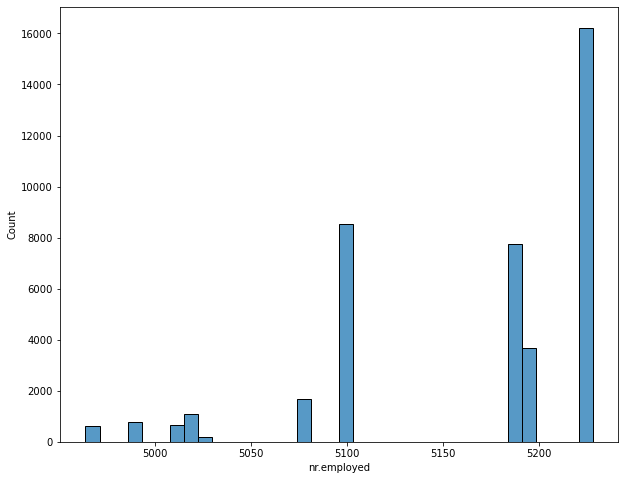

In [124]:
plt.figure(figsize=(10,8))
sns.histplot(df["nr.employed"])

Text(0.5, 1.0, 'Number of employee')

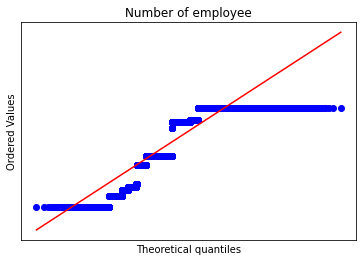

In [110]:
pylab.xticks([]),pylab.yticks([])
stats.probplot(df['nr.employed'], dist="norm", plot=pylab)
pylab.title('Number of employee')

In [111]:
# H0: Number of employee follows normal distribution
lilliefors(df['nr.employed'])

(0.30198068325869665, 0.0009999999999998899)

Since p-value= 0.0009999999999998899<0.05, we can conclude that the underlying distribution is not normal.

In [112]:
#H0: Variances of the two groups of Number of employee based on subscription are same
employed_yes=df["nr.employed"][df.y=='yes']
employed_no=df['nr.employed'][df.y=='no']
stat, p = levene(employed_yes,employed_no)
if p < alpha:
    print("Variance of two groups are different ")
else:
    print("Variance of the two groups are equivalent")

Variance of two groups are different 


Since the assumptions of point biserial correlation coefficient are not fulfilled, it cannot be used to measure the association between "nr.employed" and "y".

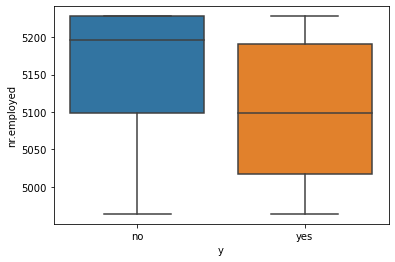

In [113]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="nr.employed")
plt.show()